In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import zipfile
import os

import tensorflow as tf
import tensorflow_decision_forests as tfdf

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [321]:
## Log messages
## How to update old model? warm-start training, model distillation

In [416]:
full_data = pd.read_csv('cook_county_train.csv')
full_data = log_transform(full_data, 'Sale Price')
full_data.drop(['PIN', 'Construction Quality', 'Site Desirability', 'Other Improvements', 'Deed No.',
                   'Sale Half of Year', 'Sale Quarter of Year', 'Description', 'Modeling Group', 'Unnamed: 0', 
                'Estimate (Land)', 'Estimate (Building)'
               ], axis=1, inplace=True)
numeric_cols = full_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_ds = full_data[numeric_cols]

<Axes: >

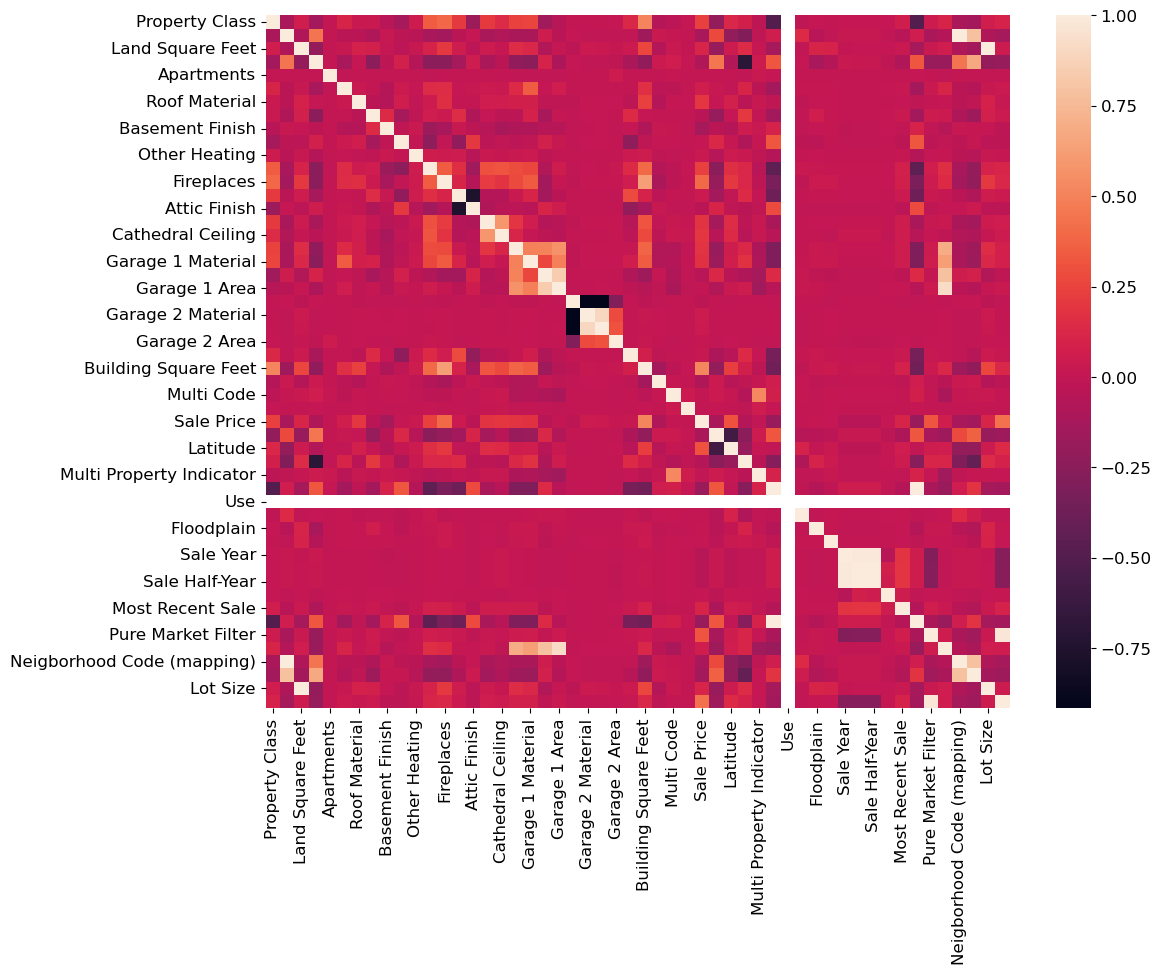

In [417]:
correlation_matrix = numeric_ds.corr()
sns.heatmap(correlation_matrix)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential


def rmse_loss(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

X = numeric_ds.drop(['Sale Price', 'Log Sale Price'], axis = 1)
y = numeric_ds['Sale Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
input_dim = X_train.shape[1]

model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = rmse_loss, metrics = [tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 7. Evaluating the Model
loss, rmse = model.evaluate(X_test, y_test)
print("Test RMSE:", rmse)

Epoch 1/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 615us/step - loss: 337167.9062 - root_mean_squared_error: 364700.8125 - val_loss: 212494.0938 - val_root_mean_squared_error: 232655.4062
Epoch 2/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step - loss: 204043.3281 - root_mean_squared_error: 250813.2188 - val_loss: 172685.8438 - val_root_mean_squared_error: 194256.7188
Epoch 3/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step - loss: 169536.1406 - root_mean_squared_error: 199091.8281 - val_loss: 162059.6094 - val_root_mean_squared_error: 183551.3750
Epoch 4/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 159584.9219 - root_mean_squared_error: 193010.4375 - val_loss: 158377.1250 - val_root_mean_squared_error: 178659.0781
Epoch 5/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 2s 566us/step - loss: 158980.5781 - root_mean_squared_error: 200227.5312 - val_loss: 155975.9062 - val_root_mean_squared_error: 176174.8906
Epoch 6/100
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 2s 585us/step - loss: 157801.0000 - root_m

In [425]:
model.save('best_model.keras')

In [447]:
X.columns

Index(['Property Class', 'Neighborhood Code', 'Land Square Feet', 'Town Code',
       'Apartments', 'Wall Material', 'Roof Material', 'Basement',
       'Basement Finish', 'Central Heating', 'Other Heating', 'Central Air',
       'Fireplaces', 'Attic Type', 'Attic Finish', 'Design Plan',
       'Cathedral Ceiling', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area', 'Porch',
       'Building Square Feet', 'Repair Condition', 'Multi Code',
       'Number of Commercial Units', 'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Age', 'Use', 'O'Hare Noise', 'Floodplain',
       'Road Proximity', 'Sale Year', 'Sale Quarter', 'Sale Half-Year',
       'Sale Month of Year', 'Most Recent Sale', 'Age Decade',
       'Pure Market Filter', 'Garage Indicator', 'Neigborhood Code (mapping)',
       'Town and Neighborhood', 'Lot Size', 'Log Sale Price'],
     